In [1]:
import numpy as np
import pandas as pd

# Create a synthetic dataset
np.random.seed(0)  # For reproducibility
data_size = 1000
X = np.random.rand(data_size, 2)  # Generate random data
X[:, 1] *= 100  # Scale the second feature

# Introduce missing values in the second feature
missing_rate = 0.3
missing_indices = np.random.choice(data_size, int(data_size * missing_rate), replace=False)
X[missing_indices, 1] = np.nan


In [2]:
from sklearn.impute import SimpleImputer

# Mean imputation
mean_imputer = SimpleImputer(strategy='mean')
X_mean_imputed = mean_imputer.fit_transform(X)

# Zero imputation
zero_imputer = SimpleImputer(strategy='constant', fill_value=0)
X_zero_imputed = zero_imputer.fit_transform(X)


In [3]:
from sklearn.impute import KNNImputer

knn_imputer = KNNImputer(n_neighbors=5)
X_knn_imputed = knn_imputer.fit_transform(X)


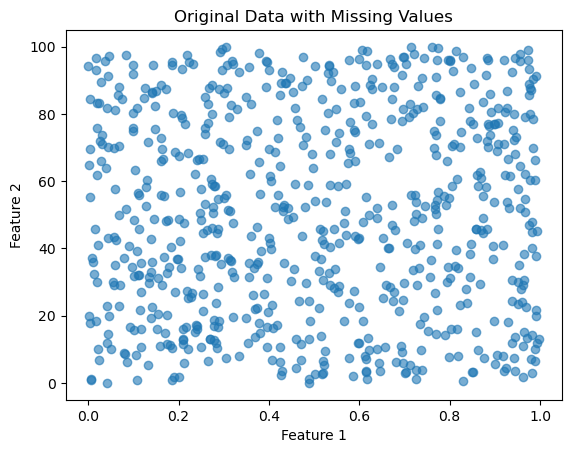

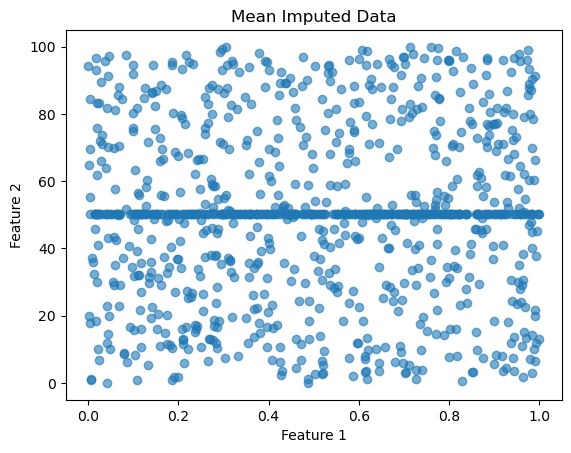

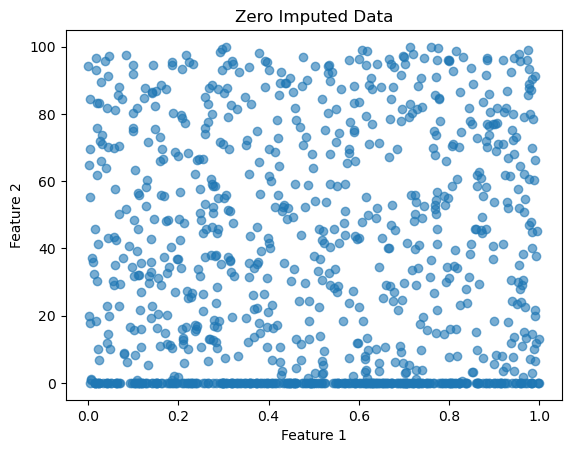

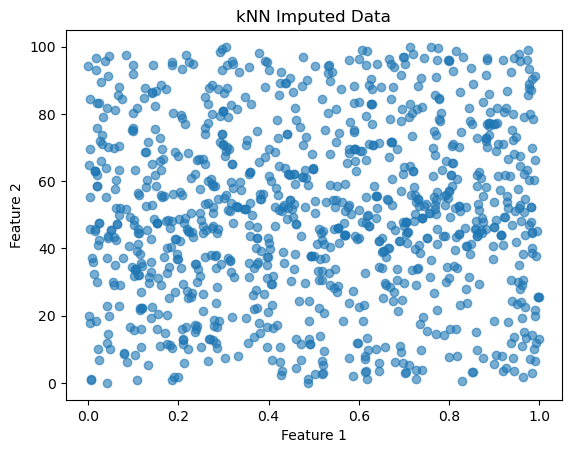

In [4]:
import matplotlib.pyplot as plt

# Function to plot data
def plot_data(X, title):
    plt.scatter(X[:, 0], X[:, 1], alpha=0.6)
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# Plot original data with missing values
plot_data(X, 'Original Data with Missing Values')

# Plot mean imputed data
plot_data(X_mean_imputed, 'Mean Imputed Data')

# Plot zero imputed data
plot_data(X_zero_imputed, 'Zero Imputed Data')

# Plot kNN imputed data
plot_data(X_knn_imputed, 'kNN Imputed Data')


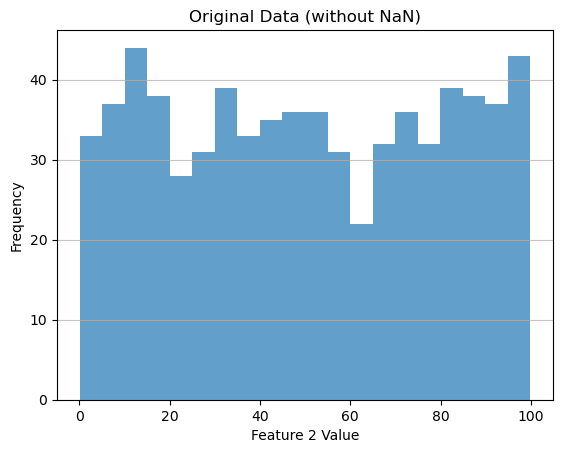

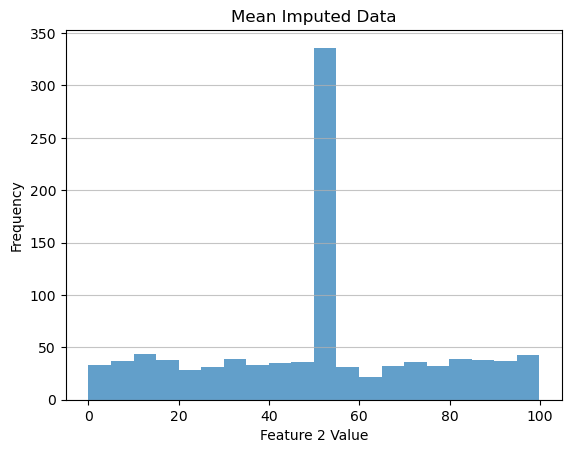

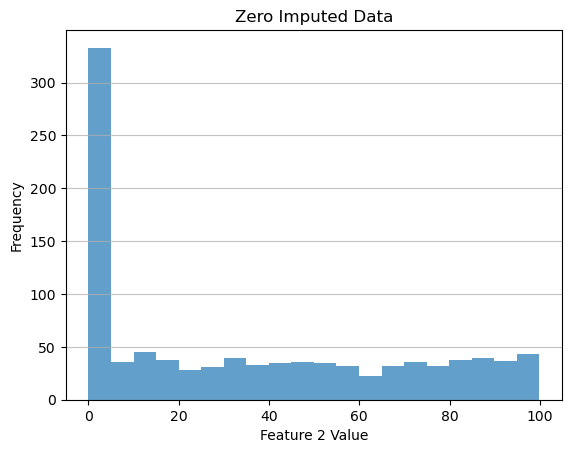

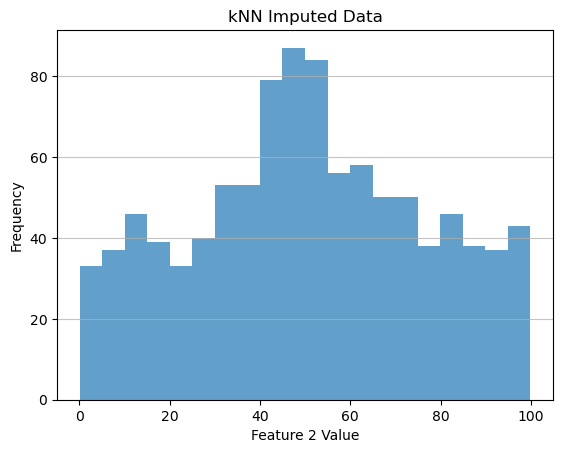

In [5]:
# Function to plot histogram
def plot_histogram(X, title, bins=20):
    plt.hist(X[:, 1], bins=bins, alpha=0.7)
    plt.title(title)
    plt.xlabel('Feature 2 Value')
    plt.ylabel('Frequency')
    plt.grid(axis='y', alpha=0.75)
    plt.show()

# Plot histogram for original data (masking out missing values for visualization)
original_data_without_nan = X[~np.isnan(X[:, 1])]
plot_histogram(original_data_without_nan, 'Original Data (without NaN)')

# Plot histogram for mean imputed data
plot_histogram(X_mean_imputed, 'Mean Imputed Data')

# Plot histogram for zero imputed data
plot_histogram(X_zero_imputed, 'Zero Imputed Data')

# Plot histogram for kNN imputed data
plot_histogram(X_knn_imputed, 'kNN Imputed Data')


In [14]:
from mysenseds.modules.config.user_info import USER_INFO

In [15]:
def dict_to_rows(data, path=None):
    if path is None:
        path = []
    if isinstance(data, dict):
        rows = []
        for k, v in data.items():
            rows.extend(dict_to_rows(v, path + [k]))
        return rows
    else:
        # Return the current path and the value as a single row
        return [path + [data]]

# Convert the dictionary to a list of rows, with each row being a path-value pair
rows = dict_to_rows(USER_INFO)

# Determine the maximum depth to normalize the length of each row
max_depth = max(len(row) for row in rows)

# Normalize rows to have the same length by padding shorter rows with None
normalized_rows = [row + [None] * (max_depth - len(row)) for row in rows]

# Convert the list of rows into a DataFrame
df = pd.DataFrame(normalized_rows)

# Optionally, rename columns to something more meaningful
column_names = [f'Level {i+1}' for i in range(max_depth - 1)] + ['Value']
df.columns = column_names

# Save the DataFrame to an Excel file
df.to_excel('nested_dict.xlsx', index=False, engine='openpyxl')

In [16]:
df

,Level 1,Level 2,Level 3,Level 4,Level 5,Level 6,Value
0,lastActiveTS,0,None,None,None,None,NaN
1,doorStillOpen,0,None,None,None,None,NaN
2,lastChairOnTS,0,None,None,None,None,NaN
3,lastChairOffTS,0,None,None,None,None,NaN
4,lastCheckTS,0,None,None,None,None,NaN
...,...,...,...,...,...,...,...
393,nightTimeExcursions,last7DayStd,0,None,None,None,NaN
394,nightTimeExcursions,last3DayAverage,0,None,None,None,NaN
395,nightTimeExcursions,last3DayStd,0,None,None,None,NaN
396,nightTimeExcursions,last28DayAverage,0,None,None,None,NaN


In [13]:
500*0.6

300.0

In [17]:
USER_INFO

{'lastActiveTS': 0,
 'doorStillOpen': 0,
 'lastChairOnTS': 0,
 'lastChairOffTS': 0,
 'lastCheckTS': 0,
 'lastDoorTS': 0,
 'LastCheckHrTS': 0,
 'lastCheckRhrTS': 0,
 'doorUsed': False,
 'outAtNight': False,
 'nightWindow': {'start': '21:00', 'end': '06:00'},
 'activeHr': {'eventIdHr': None, 'minutes': 0, 'ts': 0},
 'sleep': {'move': [],
  'state': 'awake',
  'inBed': False,
  'prevTS': 0,
  'lastOn': 0,
  'lastOff': 0,
  'bufferX': [],
  'bufferD': [],
  'prevSPow': 0,
  'debounce': 0,
  'p10Count': 0,
  'p25Count': 0,
  'totCount': 0,
  'noMoveCount': 0,
  'upAtNight': 0,
  'last_bed_out_ts': 0,
  'last_bed_in_bool': False},
 'sleepScore': {'last7DayAverage': 0, 'last7DayStd': 0},
 'RSSI': {'avg': 0,
  'things': {'Toilet': -90,
   'BathroomDoor': -90,
   'Fridge': -90,
   'Tap': -90,
   'Wearable': -90,
   'Plug': -90,
   'Chair': -90,
   'FrontDoor': -90}},
 'atHome': True,
 'ts': 0,
 'TZ': 'Europe/London',
 'sensors': {'TapUse': {'lastCheckedTS': 0, 'stats': {'avg': 0, 'std': 0}},
  